In [38]:
# importing libraries 
from scipy.special import gamma
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
# Gamma function
Γ = lambda x: gamma(x) 

In [39]:
# setting a theme for plots
sns.set()

In [40]:
# parameters 
V0 = 0.05
λ = 0.3 
θ = 0.05 
ν = 0.1 
α = 0.6 
r = 2.5
m = 10**5
Δt = 10**(-5)
n = 20 
U0 = 0 

In [41]:
# define steps between 0 and T
j = np.arange(m+1) 
tj = j*Δt
tj = tj.reshape(-1, 1)

In [42]:
# vector for compting xi and ci 
i = np.arange(1, n+1)

In [43]:
# compute ci based on the formula detailed in the course 
ci = (r**(1-α)-1)/(Γ(α)*Γ(2-α))*r**((1-α)*(i-1-(n/2)))
ci = ci.reshape(1, -1) 

In [44]:
# compute xi based on the formula in the course 
xi = (1-α)*(r**(2-α)-1)/((2-α)*(r**(1-α)-1))*r**(i-1-(n/2))
xi = xi.reshape(1, -1)

In [45]:
# compute g0 for each time step 
# To facilitate the calculation vectors is used 
g0 = V0 + λ*θ*(ci*((1 - np.exp(-xi*tj))/xi)).sum(axis=-1) 

In [46]:
# Vector containing volatilites at each time step
Vj = np.zeros((m+1, 1)) 
# matrix needed for computing volatilites with axis=0 represents the steps and axis=1 the axis for computing xi and ci
Uji = np.zeros((m+1, n))
# U0 =0
Uji[0] = U0 
# Normal random variable 
Zj = np.random.normal(size=m)

In [47]:
for k in range(m): 
    # computing the volatility as described on the course 
    Vj[k] = g0[k] + (ci*Uji[k]).sum(axis=1) 
    Uji[k+1] = (1/(1+xi*Δt))*(Uji[k] - λ*Vj[k]*Δt + ν*np.sqrt(np.maximum(0, Vj[k]))*np.sqrt(Δt)*Zj[k])
    

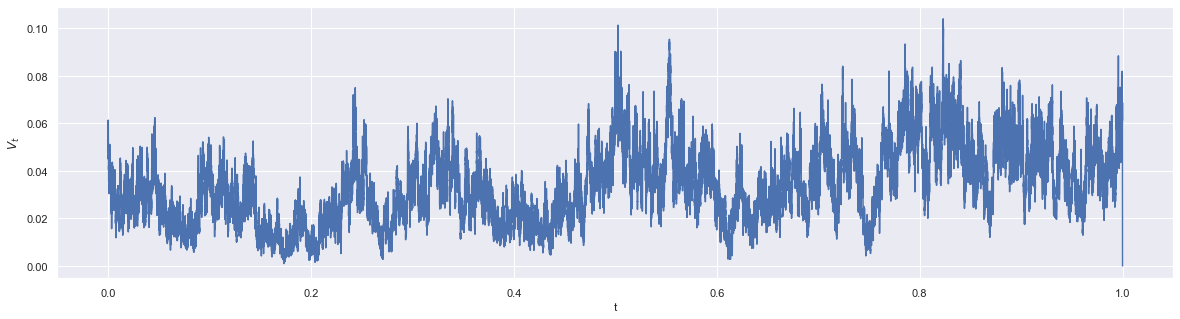

In [48]:
# plot the evolution of the volatility under the Lifted Heston model
plt.figure(figsize=(20, 5))
plt.plot(tj, Vj) 
plt.xlabel("t")   
plt.ylabel("$V_t$")

plt.show()  

In [49]:
# q and Delta are fixed as shown on the project description
Δ = np.arange(1, 11).astype(int)
q = np.arange(0.5, 2.5, 0.5)
q = q.reshape(1, -1)

In [50]:
# compute the moment of order q (1/mΔ)Σ|Vti+Δ - Vti|**q 
m = np.empty((q.shape[1], Δ.shape[0]))

for k, Δk in enumerate(Δ):  
    
    m[:, k] = (np.abs(Vj[Δk:]-Vj[:-Δk])**q).mean(axis=0) 


In [51]:
# importing the linear regession model from sklearn 
lg = LinearRegression()

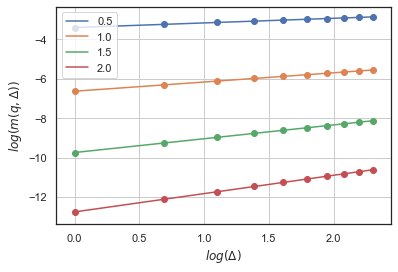

In [52]:
# change plot theme 
sns.set_style("white")
p = q.shape[1]
ζq = np.empty(p) 
 
for i in range(p):
    # fitting the logarithm of the obtained moment 
    fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[i, :]))
    # extract the coefficient 
    ζq[i] = fit.coef_
    plt.scatter(np.log(Δ), np.log(m[i, :]) ) 
    # plotting the fitted line 
    plt.plot(np.log(Δ), lg.predict(np.log(Δ.reshape(-1, 1)) )) 
plt.legend(q[0, :]) 
plt.xlabel("$log(\Delta)$") 
plt.ylabel("$log(m(q, \Delta))$")
plt.grid() 

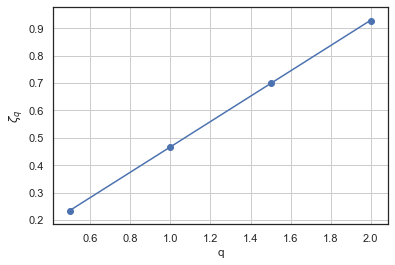

In [53]:
# another fit this time of the coefficients obtained 
fit = lg.fit(q.reshape(-1, 1), ζq)
# the coefficient of the line is H 
H = fit.coef_ 
b = fit.intercept_
plt.scatter(q[0, :], ζq)
plt.plot(q[0, :], H*q[0, :] + b)   
plt.xlabel("q") 
plt.ylabel("$\zeta_q$")
plt.grid()

In [54]:
# return the value of H
print(H)

[0.46295633]


In [55]:
# redoing the same steps as above without ploting
p = q.shape[1]
ζq = np.empty(p)
l = np.arange(1, 11)
H = np.empty(len(l)) 
for s, ls in enumerate(l):  
    m = np.empty((Δ.shape[0], q.shape[1]))

    for k, Δk in enumerate(Δ):  
        # Vtkl are the values used for a fixed l to extract the value of H
        m[k, :] = (np.abs(Vj[::ls][Δk:]-Vj[::ls][:-Δk])**q).mean(axis=0)
        for i in range(p):
            fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[:, i]))
            ζq[i] = fit.coef_
        fit = lg.fit(q.reshape(-1, 1), ζq)
        H[s] = fit.coef_  
            

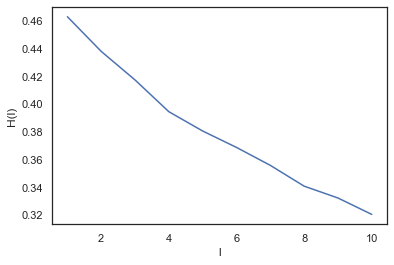

In [56]:
# plot the evolution of H as a function of L 
plt.plot(l, H)
plt.xlabel("l")
plt.ylabel("H(l)") 
plt.show()

## In the case of a Bownien motion 

In [57]:
m = 10**5
Δt = 10**(-5)

In [58]:
# simulating a brownien motion by summing normal random variable realisations 
sns.set()
j = np.arange(m+1) 
tj = j*Δt
Wt = np.empty(m+1)
Wt[0] = 0 
Wt[1:] = np.sqrt(Δt)*np.random.normal(size=m).cumsum()
Wt = Wt.reshape(-1, 1)

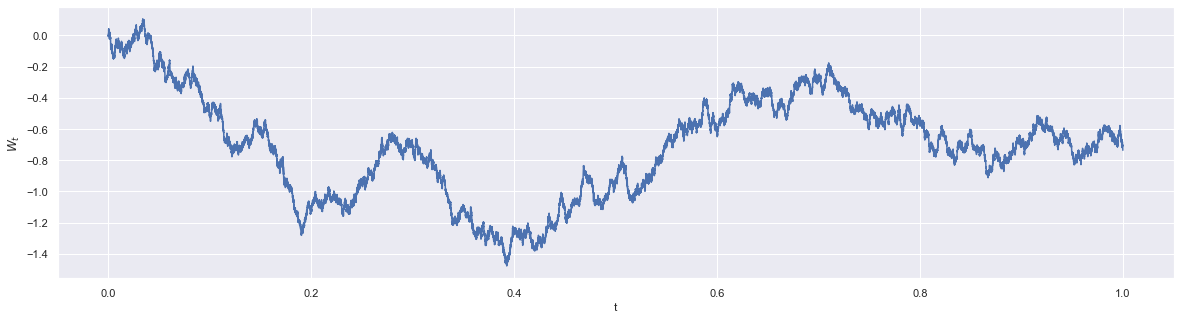

In [60]:
sns.set()
plt.figure(figsize=(20, 5))
plt.plot(tj, Wt)
plt.xlabel("t") 
plt.ylabel("$W_t$")
plt.show()

### the exact same steps are reused for the following parts 

In [61]:
Δ = np.arange(1, 11).astype(int)
q = np.arange(0.5, 2.5, 0.5)
q = q.reshape(1, -1)

In [62]:

m = np.empty((q.shape[1], Δ.shape[0]))

for k, Δk in enumerate(Δ):  
    
    m[:, k] = (np.abs(Wt[Δk:]-Wt[:-Δk])**q).mean(axis=0) 

In [63]:
lg = LinearRegression()

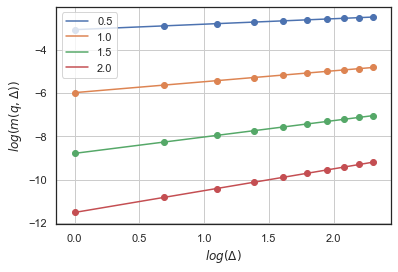

In [64]:
sns.set_style("white")
p = q.shape[1]
ζq = np.empty(p) 
 
for i in range(p):
    fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[i, :]))
    ζq[i] = fit.coef_
    plt.scatter(np.log(Δ), np.log(m[i, :]) ) 
    plt.plot(np.log(Δ), lg.predict(np.log(Δ.reshape(-1, 1)) )) 
plt.legend(q[0, :]) 
plt.xlabel("$log(\Delta)$") 
plt.ylabel("$log(m(q, \Delta))$")
plt.grid() 

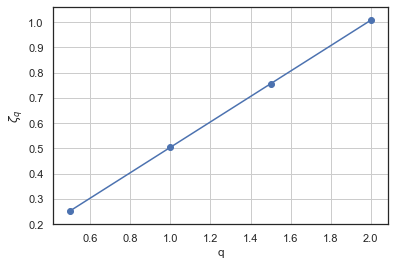

In [65]:
fit = lg.fit(q.reshape(-1, 1), ζq)
H = fit.coef_ 
b = fit.intercept_
plt.scatter(q[0, :], ζq)
plt.plot(q[0, :], H*q[0, :] + b) 
plt.xlabel("q") 
plt.ylabel("$\zeta_q$")
plt.grid()

In [66]:
print(H)

[0.50366547]


In [67]:
p = q.shape[1]
ζq = np.empty(p)
l = np.arange(1, 11)
H = np.empty(len(l)) 
for s, ls in enumerate(l):  
    m = np.empty((Δ.shape[0], q.shape[1]))

    for k, Δk in enumerate(Δ):  

        m[k, :] = (np.abs(Wt[::ls][Δk:]-Wt[::ls][:-Δk])**q).mean(axis=0)
        for i in range(p):
            fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[:, i]))
            ζq[i] = fit.coef_
        fit = lg.fit(q.reshape(-1, 1), ζq)
        H[s] = fit.coef_ 

Text(0, 0.5, 'H(l)')

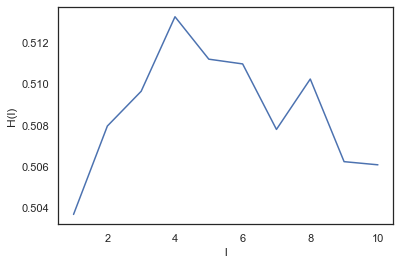

In [68]:
plt.plot(l, H)
plt.xlabel("l") 
plt.ylabel("H(l)") 

## In case of a factional Brownien motion

In [69]:
m = 10**3
Δt = 10**(-3)
H = 0.1 

In [70]:
WHt = np.empty(m+1)
WHt[0] = 0
ti = Δt*np.arange(1, m+1).reshape(-1, 1)
tj = Δt*np.arange(1, m+1).reshape(1, -1)  
# create covariance matrix
sigmaH = 0.5*(ti**(2*H) + tj**(2*H) - np.abs(ti - tj)**(2*H))
# obtain the cholesky decompostion from the covariance matrix 
C = np.linalg.cholesky(sigmaH)  
# simulate normal random variables 
Z = np.random.normal(0, 1, len(ti))
# WHt simulation (we denote that the decomposition with numpy is C*C.T)
WHt[1:] = C.dot(Z) 
WHt = WHt.reshape(-1, 1)

In [71]:
# insert 
tj  = np.insert(tj, 0, 0).reshape(-1, 1)

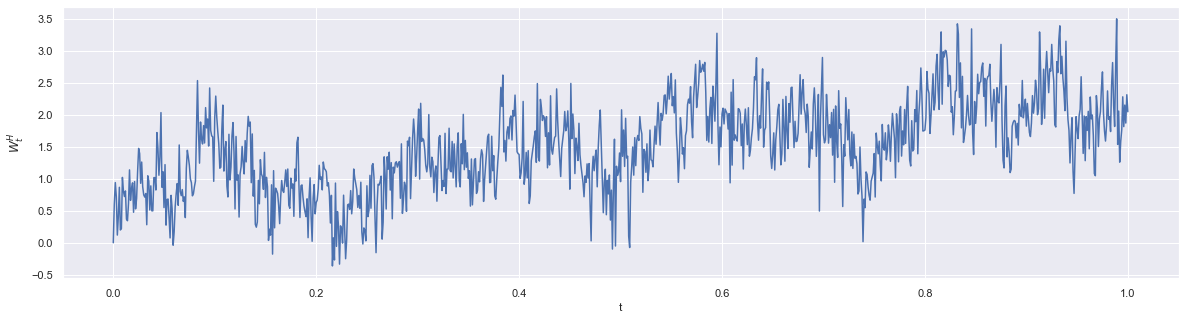

In [72]:
sns.set()
plt.figure(figsize=(20, 5))
plt.plot(tj, WHt) 
plt.xlabel("t") 
plt.ylabel("$W^H_t$") 
plt.show()

In [73]:
Δ = np.arange(1, 11).astype(int)
q = np.arange(0.5, 2.5, 0.5)
q = q.reshape(1, -1)

In [74]:
m = np.empty((q.shape[1], Δ.shape[0]))

for k, Δk in enumerate(Δ):  
    
    m[:, k] = (np.abs(WHt[Δk:]-WHt[:-Δk])**q).mean(axis=0)  

In [75]:
lg = LinearRegression()

In [76]:
sns.set_style("white")

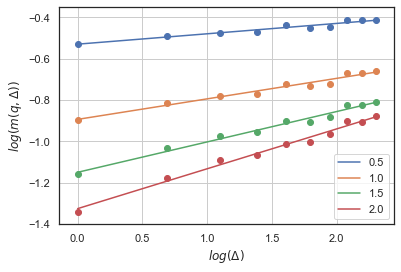

In [77]:

p = q.shape[1]
ζq = np.empty(p) 
 
for i in range(p):
    fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[i, :]))
    ζq[i] = fit.coef_
    plt.scatter(np.log(Δ), np.log(m[i, :]) ) 
    plt.plot(np.log(Δ), lg.predict(np.log(Δ.reshape(-1, 1)) )) 
plt.legend(q[0, :]) 
plt.grid() 
plt.xlabel("$log(\Delta)$") 
plt.ylabel("$log(m(q, \Delta))$")
plt.show()

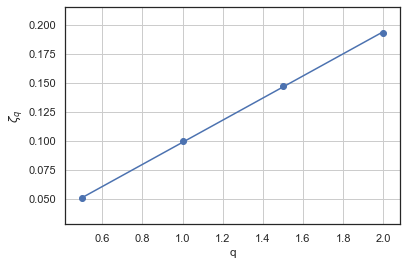

In [78]:
fit = lg.fit(q.reshape(-1, 1), ζq)
H = fit.coef_ 
b = fit.intercept_
plt.scatter(q[0, :], ζq)
plt.plot(q[0, :], H*q[0, :] + b)
plt.xlabel("q") 
plt.ylabel("$\zeta_q$")
plt.grid()
plt.show()

In [79]:
print(H)

[0.0951765]


In [80]:
p = q.shape[1]
ζq = np.empty(p)
l = np.arange(1, 11)
H = np.empty(len(l)) 
for s, ls in enumerate(l):  
    m = np.empty((Δ.shape[0], q.shape[1]))

    for k, Δk in enumerate(Δ):  

        m[k, :] = (np.abs(WHt[::ls][Δk:]-WHt[::ls][:-Δk])**q).mean(axis=0) 
        for i in range(p):
            fit = lg.fit(np.log(Δ.reshape(-1, 1)), np.log(m[:, i]))
            ζq[i] = fit.coef_
        fit = lg.fit(q.reshape(-1, 1), ζq)
        H[s] = fit.coef_ 

Text(0, 0.5, 'H(l)')

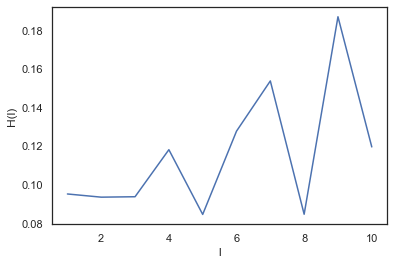

In [81]:
plt.plot(l, H)
plt.xlabel("l") 
plt.ylabel("H(l)") 